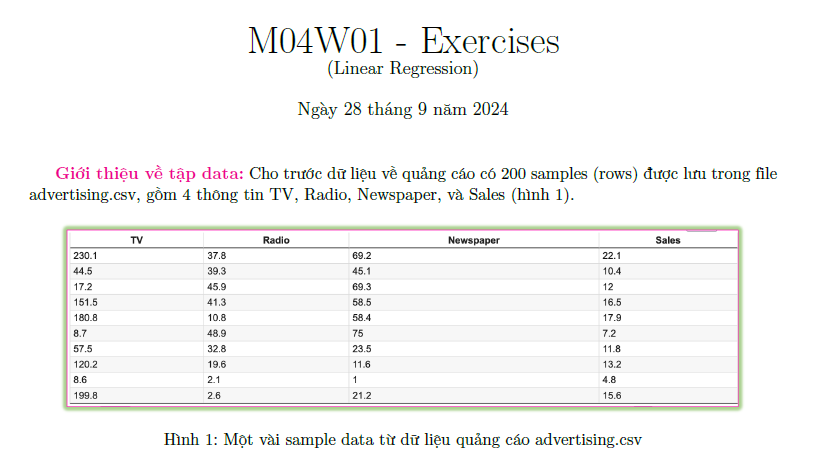

## I. Import necessary library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

## Ex 1: Read and preprocessing csv file A

Bài tập 1 (kỹ thuật đọc và xử lý dữ liệu từ file .csv): Cho trước file dữ liệu advertising.csv, hãy hoàn thành function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output).

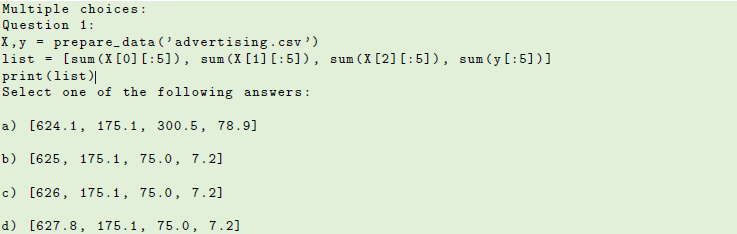

In [ ]:
df = pd.read_csv("./content/advertising_W04.csv")

In [ ]:
df

In [ ]:
def get_column (data , index):
    return [row[index] for row in data if len(row) > index]

def prepare_data(file_name_dataset):
    # Load the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Get the length of the dataset
    N = len(data)
    
    # Get tv data (index=0)
    tv_data = get_column(data, 0)
    
    # Get radio data (index=1)
    radio_data = get_column(data, 1)
    
    # Get newspaper data (index=2)
    newspaper_data = get_column(data, 2)
    
    # Get sales data (index=3)
    sales_data = get_column(data, 3)
    
    # Build X input (tv, radio, newspaper) and y output (sales) for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

X,y = prepare_data('./content/advertising_W04.csv')
list_r = [round(sum(X[0][:5]),1) , round(sum(X[1][:5]),1) , round(sum(X[2][:5]),1) , round(sum(y[:5]),1)]
print(list_r)

## Ex 2: One Sample - Linear Regression Technique A

Bài tập 2 (kỹ thuật huấn luyện data dùng one sample - linear regression): Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆy − y)2. Sơ đồ hoạt động của giải thuật được mô tả ở hình 2. Nhiệm vụ của bạn là hoàn thành function implement_linear_regression(X_data, y_data, epoch_max, lr) và trả về 4 tham số w1, w2, w3, b và lịch sử tính loss như bên dưới.

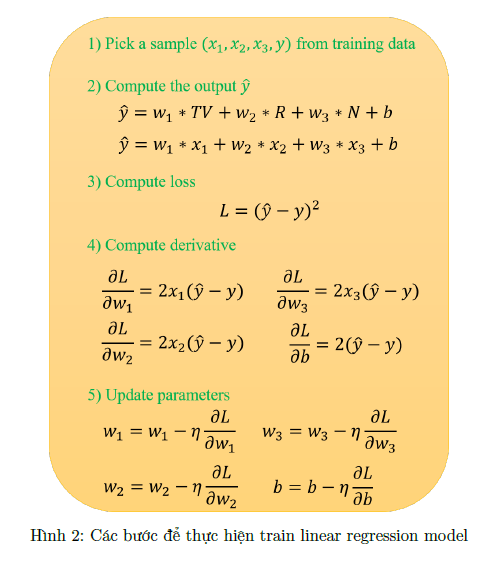

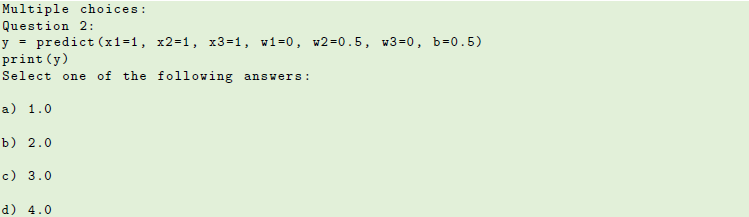

In [ ]:
def implement_linear_regression (X_data , y_data , epoch_max = 50, lr = 0.05):
    losses = []
    
    w1 , w2 , w3 , b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
    
            y = y_data[i]
            
            # compute output
            y_hat = predict(x1 , x2 , x3 , w1 , w2 , w3 , b)
            
            # compute loss
            loss = compute_loss(y=y, y_hat=y_hat)
            
            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1 , y, y_hat)
            dl_dw2 = compute_gradient_wi(x2 , y, y_hat)
            dl_dw3 = compute_gradient_wi(x3 , y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db , lr)
            
            # logging
            losses.append(loss)
    return(w1 ,w2 ,w3 ,b, losses)

2.1 Hoàn thành function initialize_params() để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) và b = 0. Ở bước này các bạn có thể dùng hàm sau để khởi tạo bốn tham số trên.

In [ ]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1 , w2 , w3 , b

def initialize_params_for_exer():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

In [ ]:
def predict(x1 , x2 , x3 , w1 , w2 , w3 , b):
    return x1*w1 + x2*w2 + x3*w3 + b

In [ ]:
#y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5 , w3=0, b=0.5)
#y

## Ex 3: Mean Squared Error A

Bài tập 3 Hoàn thành function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

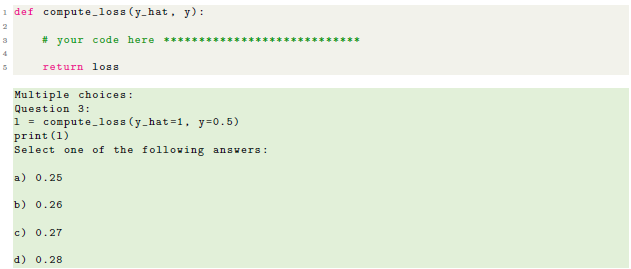

In [ ]:
import numpy as np

def compute_loss(y_hat, y):
    return float(np.sum(np.square(y_hat - y)))

# def compute_loss(y_hat, y):
#     return (y_hat - y)**2

l = compute_loss(y_hat=1, y=0.5)
l

## Ex 4: Compute Gradient W A
## Ex 5: Compute Gradient B B

Bài tập 4: Hoàn thành function compute_gradient_wi(xi, y, y_hat)) để tính đạo hàm của hàm loss L = (ˆy −y)2 theo wi và function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss L = (ˆy − y)2 theo b.

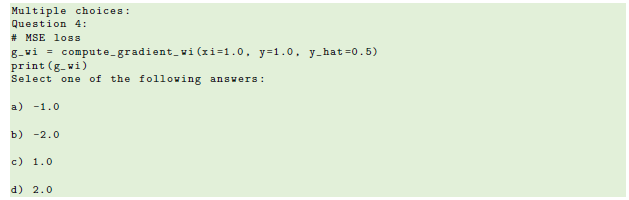

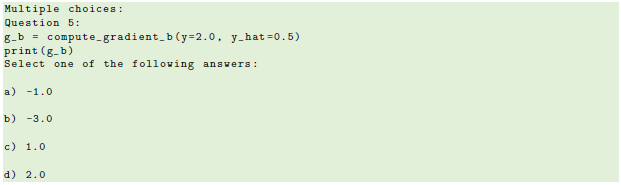

In [ ]:
def compute_gradient_wi(x1 , y, y_hat):
    return 2*x1*(y_hat - y)
    
def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)
    
def computer_gradient_(x, y_hat, y):
    # Dao ham cua loss/weight
    dl_dw = 2*x*(y_hat - y)
    dl_db = 2*(y_hat - y)
    return dl_dw, dl_db

g_wi = computer_gradient_(x =1.0 ,y_hat=0.5 , y =1)
print(g_wi[0])

g_b = computer_gradient_(x=1, y_hat =0.5,y=2.0)
print(g_b[1])

g_wi = compute_gradient_wi(x1 =1.0 ,y_hat=0.5 , y =1)
print(g_wi)

g_b = compute_gradient_b(y_hat =0.5,y=2.0)
print(g_b)

## Ex 6: Update Weights W A
## Ex 7: Update Weights B A

Bài tập 6: Hoàn thành function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.

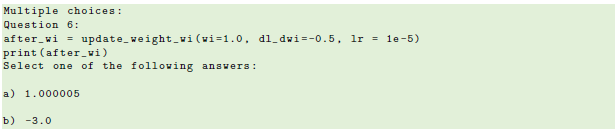
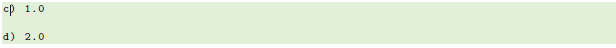

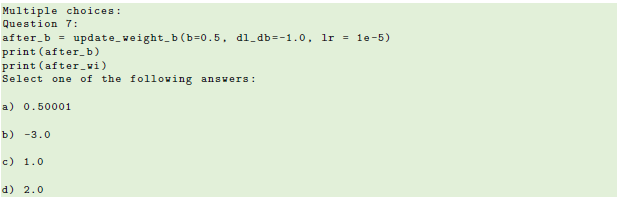

In [ ]:
def update_weight_wi(w1, dl_dw1, lr):
    return w1-lr*dl_dw1
    
def update_weight_b(b, dl_db , lr):
    return b-lr*dl_db
    
def update_(w, b, dl_dw, dl_db, lr):
    w = w-lr*dl_dw
    b = b-lr*dl_db
    return w, b

after_wi = update_(w=1.0 ,b=1,dl_db=1, dl_dw=-0.5, lr=1e-5)
print(after_wi[0])

after_b = update_(b=0.5, dl_db=-1.0, lr=1e-5, w=1, dl_dw=1)
print(after_b[1])

after_wi = update_weight_wi(w1=1.0, dl_dw1=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

## Ex 8: Update Weights B A

Bài tập 8: Thực hiện huấn luyện data bằng cách gọi hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên) như bên hình 3.

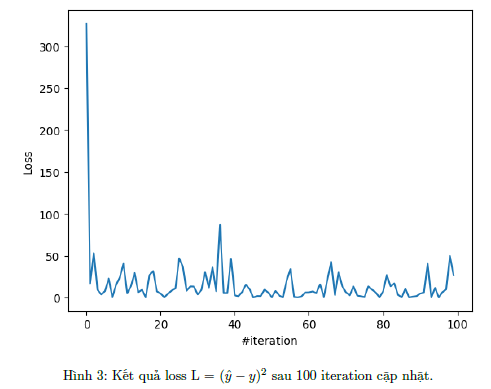

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to extract a column from data
def get_column(data, index):
    return [row[index] for row in data if len(row) > index]

# Prepare the dataset, X (features) and y (target)
def prepare_data(file_name_dataset):
    # Load the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Get tv data (index=0)
    tv_data = get_column(data, 0)
    
    # Get radio data (index=1)
    radio_data = get_column(data, 1)
    
    # Get newspaper data (index=2)
    newspaper_data = get_column(data, 2)
    
    # Get sales data (index=3)
    sales_data = get_column(data, 3)
    
    # Build X input (tv, radio, newspaper) and y output (sales) for training
    X = np.array([tv_data, radio_data, newspaper_data]).T  # transpose to match (N, 3) shape
    y = np.array(sales_data)
    
    return X, y

# Initialize weights and bias
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

# Function to implement linear regression using stochastic gradient descent
def implement_linear_regression_sgd(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0

        # Loop over each sample
        for i in range(N):
            x1, x2, x3 = X_data[i]
            y = y_data[i]

            # Compute predicted value
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)
            loss_total += loss
            losses.append(loss)
            # Compute gradients for w1, w2, w3, and b
            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)

            # Update parameters after each sample
            w1 -= lr * dw1
            w2 -= lr * dw2
            w3 -= lr * dw3
            b -= lr * db

    return w1, w2, w3, b, losses

# Predict function (linear regression model)
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

# Mean Squared Error (MSE) loss function
def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

# Gradient computation for weights (derivatives of the loss function)
def compute_gradient_wi(x, y, y_hat):
    return -2 * x * (y - y_hat)

# Gradient computation for bias (derivative of the loss function)
def compute_gradient_b(y, y_hat):
    return -2 * (y - y_hat)

# Load the dataset and prepare the inputs and outputs
X_data, y_data = prepare_data('./content/advertising_W04.csv')

# Run linear regression with SGD and get the final weights and bias
w1, w2, w3, b, losses = implement_linear_regression_sgd(X_data, y_data, epoch_max=50, lr=1e-5)

# Print final parameters and losses
print(f"Final weights: w1={w1}, w2={w2}, w3={w3}, bias={b}")
print(f"Loss history (final epoch): {sum(losses)/len(y_data)}")
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

# Example: Predict sales with new data
tv, radio, newspaper = 19.2, 35.9, 51.3
predicted_sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"Predicted Prices:{predicted_sales}")

In [ ]:
def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)

l = compute_loss_mae(y=0.5, y_hat=1)
print(l)

In [ ]:
import numpy as np

# Function to extract a column from data
def get_column(data, index):
    return [row[index] for row in data if len(row) > index]

# Prepare the dataset, X (features) and y (target)
def prepare_data(file_name_dataset):
    # Load the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Get tv data (index=0)
    tv_data = get_column(data, 0)
    
    # Get radio data (index=1)
    radio_data = get_column(data, 1)
    
    # Get newspaper data (index=2)
    newspaper_data = get_column(data, 2)
    
    # Get sales data (index=3)
    sales_data = get_column(data, 3)
    
    # Build X input (tv, radio, newspaper) and y output (sales) for training
    X = np.array([tv_data, radio_data, newspaper_data]).T  # transpose to match (N, 3) shape
    y = np.array(sales_data)
    
    return X, y

# Initialize weights and bias
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

# Function to implement linear regression using stochastic gradient descent
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params_for_exer()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[:, 0]
            x2 = X_data[:, 1]
            x3 = X_data[:, 2]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients for w1, w2, w3, and b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Logging
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)

# Predict function (linear regression model)
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

# Mean Squared Error (MSE) loss function
def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

# Gradient computation for weights (derivatives of the loss function)
def compute_gradient_wi(x, y, y_hat):
    return -2 * x * (y - y_hat)

# Gradient computation for bias (derivative of the loss function)
def compute_gradient_b(y, y_hat):
    return -2 * (y - y_hat)

# Load the dataset and prepare the inputs and outputs
X_data, y_data = prepare_data('./content/advertising_W04.csv')

w1, w2, w3, b, losses = implement_linear_regression_nsamples(X_data, y_data, epoch_max=10000, lr=1e-5)
print(sum(w1) ,sum(w2) ,sum(w3))
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to extract a column from data
def get_column(data, index):
    return [row[index] for row in data if len(row) > index]

# Prepare the dataset, X (features) and y (target)
def prepare_data(file_name_dataset):
    # Load the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Get tv data (index=0)
    tv_data = get_column(data, 0)
    
    # Get radio data (index=1)
    radio_data = get_column(data, 1)
    
    # Get newspaper data (index=2)
    newspaper_data = get_column(data, 2)
    
    # Get sales data (index=3)
    sales_data = get_column(data, 3)
    
    # Build X input (tv, radio, newspaper) and y output (sales) for training
    X = np.array([tv_data, radio_data, newspaper_data]).T  # transpose to match (N, 3) shape
    y = np.array(sales_data)
    
    return X, y

# Initialize weights and bias
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

# Function to implement linear regression using stochastic gradient descent
def implement_linear_regression_sgd(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        # Loop over each sample
        for i in range(N):
            x1, x2, x3 = X_data[i]
            y = y_data[i]

            # Compute predicted value
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mae(y, y_hat)
            losses.append(loss)
            
            # Compute gradients for w1, w2, w3, and b
            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)

            # Update parameters after each sample
            w1 -= lr * dw1
            w2 -= lr * dw2
            w3 -= lr * dw3
            b -= lr * db

    return w1, w2, w3, b, losses

# Predict function (linear regression model)
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)

# Gradient computation for weights (derivatives of the loss function)
def compute_gradient_wi(x, y, y_hat):
    return -2 * x * (y - y_hat)

# Gradient computation for bias (derivative of the loss function)
def compute_gradient_b(y, y_hat):
    return -2 * (y - y_hat)

# Load the dataset and prepare the inputs and outputs
X_data, y_data = prepare_data('./content/advertising_W04.csv')

# Run linear regression with SGD and get the final weights and bias
w1, w2, w3, b, losses = implement_linear_regression_sgd(X_data, y_data, epoch_max=100, lr=1e-5)

# Print final parameters and losses
print(f"Final weights: w1={w1}, w2={w2}, w3={w3}, bias={b}")
print(f"Loss history (final epoch): {sum(losses)/len(y_data)}")
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()